In [1]:
# Ryan Ruthart January 2018
# This Jupyter Notebook takes crime data and aggregates it by month, day, and hour of day
# to count the number of crimes in each time frame. Bokeh is then used to plot out the
# results to easily compare the temporal crime trends graphically.

In [2]:
# Set up imports

import pandas as pd
import numpy as np
import datetime

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [3]:
# Read in the data
# I downloaded this csv with crimes from https://data.cityofchicago.org/Public-Safety/Crimes-2015/vwwp-7yr9/data
df = pd.read_csv('Crimes_2015.csv')

In [4]:
# Take a look at the data
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,False,...,7.0,43,02,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
1,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,28.0,27,06,NaN,NaN,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN
2,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,False,...,44.0,6,08A,1169640.0,1921442.0,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)"
3,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,...,36.0,19,02,1134262.0,1919947.0,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)"
4,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,False,...,45.0,11,18,1135867.0,1934466.0,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)"


In [5]:
def process_date(input_date):
    '''Function to process formatted date using datetime and the strptime function
    expected input in the format of "05/10/2016 03:56:50 PM"'''
    try:
        mydate = datetime.datetime.strptime(input_date, '%m/%d/%Y %I:%M:%S %p')
    except:
        mydate = datetime.datetime.strptime('1700', '%Y')
    return mydate


In [6]:
# Quick test to process a single date
t1 = process_date('06/24/2015 06:00:00 AM')
print(t1)

2015-06-24 06:00:00


In [7]:
# Apply the datetime function to the dataframe
df['DateTime'] = df.apply((lambda x: process_date(x['Date'])), axis=1)

In [8]:
# Lets calculate some of the columns for date time grouping!
df['Year'] = df.apply(lambda x: x['DateTime'].year, axis=1)
df['Month'] = df.apply(lambda x: x['DateTime'].month, axis=1)
df['Day'] = df.apply(lambda x: x['DateTime'].day, axis=1)
df['DayOfWeek'] = df.apply(lambda x: x['DateTime'].weekday(), axis=1)
df['Hour'] = df.apply(lambda x: x['DateTime'].hour, axis=1)

In [9]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Year,Updated On,Latitude,Longitude,Location,DateTime,Month,Day,DayOfWeek,Hour
0,10514462,HZ256372,01/01/2015 12:00:00 AM,073XX S EXCHANGE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,NURSING HOME/RETIREMENT HOME,False,False,...,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,2015-01-01 00:00:00,1,1,3,0
1,10515175,HZ257172,11/24/2015 05:30:00 PM,033XX W ADAMS ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,2015,05/10/2016 03:56:50 PM,NaN,NaN,NaN,2015-11-24 17:30:00,11,24,1,17
2,10077106,HY266148,05/19/2015 01:12:00 AM,009XX W BELMONT AVE,0560,ASSAULT,SIMPLE,APARTMENT,True,False,...,2015,05/11/2016 03:48:18 PM,41.939943,-87.651925,"(41.939943264, -87.651924995)",2015-05-19 01:12:00,5,19,1,1
3,10301916,HY469211,01/01/2015 12:00:00 AM,062XX W BARRY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,...,2015,05/11/2016 03:48:18 PM,41.936539,-87.781987,"(41.936538876, -87.781987083)",2015-01-01 00:00:00,1,1,3,0
4,10160687,HY313819,06/24/2015 06:00:00 AM,052XX N MARMORA AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,RESIDENCE,True,False,...,2015,05/12/2016 03:48:29 PM,41.976352,-87.775741,"(41.976351974, -87.775741229)",2015-06-24 06:00:00,6,24,2,6


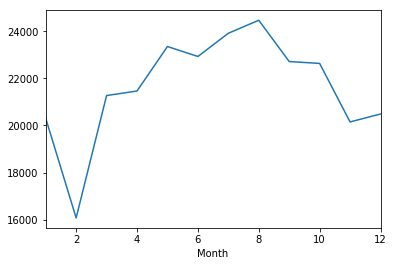

In [10]:
# Lets do a quick plot to see if we have data for every month

%matplotlib inline

df.groupby(['Month'])['Latitude'].count().plot()

## Starting with a basic grouping

To start lets look at grouping by the date of week and hour of day

In [11]:
# Aggregate the data by DayOfWeek and hour, count the number of occurences for
# each grouping
dfg = df.groupby(['DayOfWeek', 'Hour'])['Latitude'].count()
dfg.name = 'Count'

# Reset the index so we have a df to work with
dfg = dfg.reset_index().groupby(['DayOfWeek'])

# quick test to show that our list to values is working, each row has 
# 24 entries, so that is good, its the number of hours in a day
for idx, cur_df in dfg:
    print(cur_df['Count'].tolist())

[1676, 940, 761, 690, 496, 459, 647, 937, 1350, 1809, 1702, 1669, 2187, 1776, 1832, 2139, 1948, 1926, 2253, 2180, 2079, 1948, 1804, 1441]
[1487, 888, 618, 581, 416, 411, 639, 942, 1365, 1797, 1702, 1856, 2216, 1775, 1861, 2027, 1949, 2005, 2234, 2201, 2031, 2062, 1861, 1477]
[1560, 796, 683, 590, 438, 461, 636, 935, 1404, 1780, 1688, 1834, 2253, 1902, 1978, 2067, 2039, 2093, 2260, 2151, 2043, 1919, 1819, 1451]
[1754, 954, 771, 630, 510, 490, 624, 1006, 1495, 1846, 1752, 1707, 2184, 1845, 1919, 2119, 2043, 2062, 2141, 2200, 2010, 1993, 1901, 1503]
[1652, 985, 802, 675, 448, 452, 615, 925, 1371, 1803, 1644, 1741, 2231, 1844, 1929, 2191, 2124, 2073, 2310, 2333, 2144, 2111, 2164, 1833]
[1874, 1468, 1390, 1240, 848, 680, 571, 620, 959, 1379, 1540, 1608, 2053, 1649, 1749, 1913, 1797, 1772, 2101, 2093, 2034, 2082, 2124, 1856]
[2056, 1718, 1666, 1340, 1041, 782, 587, 601, 838, 1272, 1351, 1485, 1780, 1508, 1588, 1799, 1762, 1875, 1988, 2040, 2172, 1945, 1954, 1528]


In [12]:
# Lets get plotting using our nice new df

# Create a list with each of the times
times = [x for x in range(24)]

# Create a list with day of the week for plotting
day_of_week_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set up a list for plotting colors
color_list = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']

# Create a new Bokeh Figure
p = figure(plot_width=800, plot_height=400)

for idx, cur_df in dfg:
    # Loop through our grouped dataframe (which is by each day) and add the line
    # summarizing the counts to the plot
    p.line(times, cur_df['Count'].tolist(), line_width=2, color=color_list[idx], legend=day_of_week_name[idx])

show(p)

# Now to add another level of aggregation.. Month
Since we were able to look at the crimes by day of week, we can now start to look at annual trends. What about the differences between in crimes by hour for different months of the year ? 

In [13]:
# Create a new grouped dataframe, this time adding in the month
dfg2 = df.groupby(['Month', 'DayOfWeek', 'Hour'])['Latitude'].count()
dfg2.name = 'Count'

In [14]:
# Reset the index so we have a df to work with
dfg3 = dfg2.reset_index().groupby(['Month'])

In [15]:
# To solve this multi-grouping problem I am going to use a nested for loop
# This lets me to first group by the month, loop through the results and
# group each of these month dataframes by the day
# I also create a list to hold my bokeh plots so I can plot the results
# After all of hte aggregation has been completed.
p_list = []
for month_idx, month_df in dfg3:
    p = figure(plot_width=800, plot_height=400)
    for day_idx, day_df in month_df.groupby(['DayOfWeek']):
        p.line(times, day_df['Count'].tolist(), line_width=2, color=color_list[day_idx], legend=day_of_week_name[day_idx])
    p_list.append(p)

In [16]:
# Lets look at Januarys Crime Plot
show(p_list[0])

In [17]:
# And we can compare it to Junes Crime Plot
show(p_list[6])